# Image recognition in Julia

## Introduction to Flux

### Linear regression

In [1]:
using Flux.Tracker
using Flux
using DelimitedFiles: readdlm

┌ Info: Precompiling Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1186


In [2]:
isfile("housing.data") ||
  download("https://raw.githubusercontent.com/MikeInnes/notebooks/master/housing.data", "housing.data")

true

#### Read data

In [3]:
rawdata = readdlm("housing.data")'

14×505 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
   0.02731    0.02729    0.03237  …    0.06076    0.10959    0.04741
   0.0        0.0        0.0           0.0        0.0        0.0    
   7.07       7.07       2.18         11.93      11.93      11.93   
   0.0        0.0        0.0           0.0        0.0        0.0    
   0.469      0.469      0.458         0.573      0.573      0.573  
   6.421      7.185      6.998    …    6.976      6.794      6.03   
  78.9       61.1       45.8          91.0       89.3       80.8    
   4.9671     4.9671     6.0622        2.1675     2.3889     2.505  
   2.0        2.0        3.0           1.0        1.0        1.0    
 242.0      242.0      222.0         273.0      273.0      273.0    
  17.8       17.8       18.7      …   21.0       21.0       21.0    
 396.9      392.83     394.63        396.9      393.45     396.9    
   9.14       4.03       2.94          5.64       6.48       7.88   
  21.6       34.7       33.4          23.9     

In [4]:
x = rawdata[1:13,:]
y = rawdata[14:14,:]

1×505 Array{Float64,2}:
 21.6  34.7  33.4  36.2  28.7  22.9  …  16.8  22.4  20.6  23.9  22.0  11.9

In [5]:
using Statistics
x = (x .- mean(x; dims=2)) ./ std(x; dims=2)

13×505 Array{Float64,2}:
 -0.417416  -0.417418  -0.416828  …  -0.41353   -0.407858  -0.415081
 -0.486234  -0.486234  -0.486234     -0.486234  -0.486234  -0.486234
 -0.595732  -0.595732  -1.30899       0.11315    0.11315    0.11315 
 -0.272618  -0.272618  -0.272618     -0.272618  -0.272618  -0.272618
 -0.739098  -0.739098  -0.833934      0.15753    0.15753    0.15753 
  0.194741   1.28121    1.01528   …   0.983996   0.725177  -0.361293
  0.366208  -0.265527  -0.808535      0.795646   0.735312   0.433641
  0.556346   0.556346   1.0759       -0.771891  -0.66685   -0.611768
 -0.868939  -0.868939  -0.754097     -0.983782  -0.983782  -0.983782
 -0.987128  -0.987128  -1.10573      -0.803294  -0.803294  -0.803294
 -0.306024  -0.306024   0.110158  …   1.17373    1.17373    1.17373 
  0.441136   0.396591   0.416291      0.441136   0.403377   0.441136
 -0.494157  -1.20985   -1.36251      -0.984357  -0.866709  -0.670629

#### Model

In [6]:
size(x)

(13, 505)

In [7]:
in_dim = size(x, 1)
out_dim = size(y, 1);

In [8]:
randn(out_dim, in_dim)

1×13 Array{Float64,2}:
 0.178337  0.424325  0.549552  0.470526  …  -1.14494  -0.879384  0.0312972

In [9]:
predict(x) = W*x .+ b
W = param(randn(out_dim, in_dim) / 10)
b = param(zeros(out_dim))

Tracked 1-element Array{Float64,1}:
 0.0

In [10]:
error(ŷ, y) = sum((ŷ .- y).^2)/size(y, 2)

error (generic function with 1 method)

In [11]:
loss(x, y) = error(predict(x), y)

loss (generic function with 1 method)

In [12]:
function update!(ps, η = .1)
    for w in ps
        w.data .-= w.grad .* η
        w.grad .= 0
    end
end

update! (generic function with 2 methods)

#### Training

In [13]:
for i = 1:50
    back!(loss(x, y))
    update!((W, b))
    @show loss(x, y)
end

loss(x, y) = 368.2685871665087 (tracked)
loss(x, y) = 242.59559781790333 (tracked)
loss(x, y) = 163.4802444166352 (tracked)
loss(x, y) = 113.07753581004344 (tracked)
loss(x, y) = 80.89420311357719 (tracked)
loss(x, y) = 60.3115898687523 (tracked)
loss(x, y) = 47.12524112914884 (tracked)
loss(x, y) = 38.6596796649286 (tracked)
loss(x, y) = 33.21041119015139 (tracked)
loss(x, y) = 29.690455603875545 (tracked)
loss(x, y) = 27.40600989157931 (tracked)
loss(x, y) = 25.913861609555394 (tracked)
loss(x, y) = 24.930651737639874 (tracked)
loss(x, y) = 24.275072338227588 (tracked)
loss(x, y) = 23.83101144632168 (tracked)
loss(x, y) = 23.524035521511657 (tracked)
loss(x, y) = 23.30637225574301 (tracked)
loss(x, y) = 23.147315300672368 (tracked)
loss(x, y) = 23.027089815901835 (tracked)
loss(x, y) = 22.932928458220147 (tracked)
loss(x, y) = 22.856559986406243 (tracked)
loss(x, y) = 22.792601084502685 (tracked)
loss(x, y) = 22.7375259756197 (tracked)
loss(x, y) = 22.68900581975229 (tracked)
loss(x,

#### Predict

In [14]:
predict(x[:, 1]) / y[1]

Tracked 1-element Array{Float64,1}:
 1.1569127534153678

## Training image recognition model

In [15]:
using Flux, Flux.Data.MNIST
using Flux: @epochs, onehotbatch, onecold, crossentropy, throttle
using Base.Iterators: repeated, partition
using Statistics: mean
# using CuArrays

#### Load data and preprocessing

In [16]:
batch_size = 128

128

In [17]:
function minibatch(X, Y, idxs)
    X_batch = Array{Float32}(undef, size(X[1])..., 1, length(idxs))
    for i in 1:length(idxs)
        X_batch[:, :, :, i] = Float32.(X[idxs[i]])
    end
    Y_batch = onehotbatch(Y[idxs], 0:9)
    return (X_batch, Y_batch)
end

minibatch (generic function with 1 method)

In [18]:
train_labels = MNIST.labels()
train_imgs = MNIST.images()
mb_idxs = partition(1:length(train_imgs), batch_size)
train = [minibatch(train_imgs, train_labels, i) for i in mb_idxs];

In [19]:
test_imgs = MNIST.images(:test)
test_labels = MNIST.labels(:test)
test = minibatch(test_imgs, test_labels, 1:length(test_imgs));

#### Model

In [20]:
model = Chain(
    Conv((3, 3), 1=>16, pad=(2,2), relu),
    MaxPool((2, 2)),
    Conv((3, 3), 16=>32, pad=(2,2), relu),
    MaxPool((2, 2)),
    Conv((3, 3), 32=>32, pad=(2,2), relu),
    MaxPool((2, 2)),
    x -> reshape(x, :, size(x, 4)),
    Dense(800, 10), softmax)

Chain(Conv((3, 3), 1=>16, NNlib.relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), Conv((3, 3), 16=>32, NNlib.relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), Conv((3, 3), 32=>32, NNlib.relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), getfield(Main, Symbol("##5#6"))(), Dense(800, 10), NNlib.softmax)

In [21]:
model(train[1][1])

Tracked 10×128 Array{Float32,2}:
 0.000675618  0.00141853   0.0116668   …  0.00083028  0.000486997  0.00740383
 0.410782     0.159657     0.322061       0.554063    0.151973     0.418801  
 0.289362     0.173018     0.30027        0.290335    0.53797      0.315213  
 0.00211633   0.000282432  0.0273042      0.00085025  0.000195471  0.0046416 
 0.00334941   0.00250229   0.00386278     0.00363081  0.00132223   0.0023644 
 0.0285557    0.113167     0.0478305   …  0.0231491   0.0803152    0.0241923 
 0.22656      0.502208     0.172975       0.102574    0.201386     0.181563  
 0.00368573   0.0102504    0.0342856      0.00715553  0.00929782   0.0111739 
 0.00264594   0.0241531    0.00200551     0.004639    0.00199022   0.0212224 
 0.0322672    0.0133439    0.0777387      0.0127723   0.0150626    0.0134251 

#### If you have CUDA...

In [22]:
# train = gpu.(train)
# test = gpu.(test)
# model = gpu(model)

#### Loss function

In [23]:
loss(x, y) = crossentropy(model(x), y)

loss (generic function with 1 method)

In [24]:
accuracy(x, y) = mean(onecold(model(x)) .== onecold(y))

accuracy (generic function with 1 method)

#### Optimizer

In [25]:
evalcb() = @show accuracy(test[1], test[2])
opt = ADAM()

ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}())

In [26]:
loss(train[1][1], train[1][2])

4.1391735f0 (tracked)

#### Training

In [27]:
@epochs 10 Flux.train!(loss, params(model), train, opt, cb=throttle(evalcb, 10))

┌ Info: Epoch 1
└ @ Main /home/pika/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105


accuracy(test[1], test[2]) = 0.1203
accuracy(test[1], test[2]) = 0.5511
accuracy(test[1], test[2]) = 0.7974
accuracy(test[1], test[2]) = 0.8615
accuracy(test[1], test[2]) = 0.8934
accuracy(test[1], test[2]) = 0.9126
accuracy(test[1], test[2]) = 0.9283
accuracy(test[1], test[2]) = 0.9364
accuracy(test[1], test[2]) = 0.9276
accuracy(test[1], test[2]) = 0.9512
accuracy(test[1], test[2]) = 0.9556
accuracy(test[1], test[2]) = 0.9571
accuracy(test[1], test[2]) = 0.9474
accuracy(test[1], test[2]) = 0.9618
accuracy(test[1], test[2]) = 0.9643
accuracy(test[1], test[2]) = 0.957
accuracy(test[1], test[2]) = 0.9652
accuracy(test[1], test[2]) = 0.9685
accuracy(test[1], test[2]) = 0.9686
accuracy(test[1], test[2]) = 0.9729
accuracy(test[1], test[2]) = 0.9694
accuracy(test[1], test[2]) = 0.9721


┌ Info: Epoch 2
└ @ Main /home/pika/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105


accuracy(test[1], test[2]) = 0.9696
accuracy(test[1], test[2]) = 0.9706
accuracy(test[1], test[2]) = 0.9722
accuracy(test[1], test[2]) = 0.9734
accuracy(test[1], test[2]) = 0.9578
accuracy(test[1], test[2]) = 0.9721
accuracy(test[1], test[2]) = 0.9775
accuracy(test[1], test[2]) = 0.9752
accuracy(test[1], test[2]) = 0.9782
accuracy(test[1], test[2]) = 0.9805
accuracy(test[1], test[2]) = 0.9771
accuracy(test[1], test[2]) = 0.9788
accuracy(test[1], test[2]) = 0.9797
accuracy(test[1], test[2]) = 0.9771
accuracy(test[1], test[2]) = 0.9799
accuracy(test[1], test[2]) = 0.9815
accuracy(test[1], test[2]) = 0.9816
accuracy(test[1], test[2]) = 0.9804
accuracy(test[1], test[2]) = 0.9826


┌ Info: Epoch 3
└ @ Main /home/pika/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105


accuracy(test[1], test[2]) = 0.981
accuracy(test[1], test[2]) = 0.978
accuracy(test[1], test[2]) = 0.9813
accuracy(test[1], test[2]) = 0.9832
accuracy(test[1], test[2]) = 0.9807
accuracy(test[1], test[2]) = 0.9848
accuracy(test[1], test[2]) = 0.9788
accuracy(test[1], test[2]) = 0.9835
accuracy(test[1], test[2]) = 0.9839
accuracy(test[1], test[2]) = 0.9866
accuracy(test[1], test[2]) = 0.9823
accuracy(test[1], test[2]) = 0.9845
accuracy(test[1], test[2]) = 0.9843
accuracy(test[1], test[2]) = 0.986
accuracy(test[1], test[2]) = 0.9853
accuracy(test[1], test[2]) = 0.9854
accuracy(test[1], test[2]) = 0.9821
accuracy(test[1], test[2]) = 0.9848
accuracy(test[1], test[2]) = 0.9844
accuracy(test[1], test[2]) = 0.9849


┌ Info: Epoch 4
└ @ Main /home/pika/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105


accuracy(test[1], test[2]) = 0.9853
accuracy(test[1], test[2]) = 0.9844
accuracy(test[1], test[2]) = 0.9826
accuracy(test[1], test[2]) = 0.9852
accuracy(test[1], test[2]) = 0.985
accuracy(test[1], test[2]) = 0.9862
accuracy(test[1], test[2]) = 0.9867
accuracy(test[1], test[2]) = 0.986
accuracy(test[1], test[2]) = 0.9869
accuracy(test[1], test[2]) = 0.9859
accuracy(test[1], test[2]) = 0.9868
accuracy(test[1], test[2]) = 0.9864
accuracy(test[1], test[2]) = 0.9857
accuracy(test[1], test[2]) = 0.9869
accuracy(test[1], test[2]) = 0.9868
accuracy(test[1], test[2]) = 0.9868
accuracy(test[1], test[2]) = 0.9874
accuracy(test[1], test[2]) = 0.986
accuracy(test[1], test[2]) = 0.9859
accuracy(test[1], test[2]) = 0.9869
accuracy(test[1], test[2]) = 0.9842
accuracy(test[1], test[2]) = 0.9864


┌ Info: Epoch 5
└ @ Main /home/pika/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105


accuracy(test[1], test[2]) = 0.988
accuracy(test[1], test[2]) = 0.9841
accuracy(test[1], test[2]) = 0.9865
accuracy(test[1], test[2]) = 0.9846
accuracy(test[1], test[2]) = 0.9858
accuracy(test[1], test[2]) = 0.9825
accuracy(test[1], test[2]) = 0.9892
accuracy(test[1], test[2]) = 0.9865
accuracy(test[1], test[2]) = 0.9896
accuracy(test[1], test[2]) = 0.9866
accuracy(test[1], test[2]) = 0.9872
accuracy(test[1], test[2]) = 0.9892
accuracy(test[1], test[2]) = 0.9877
accuracy(test[1], test[2]) = 0.9888
accuracy(test[1], test[2]) = 0.987
accuracy(test[1], test[2]) = 0.9879
accuracy(test[1], test[2]) = 0.9861
accuracy(test[1], test[2]) = 0.9893
accuracy(test[1], test[2]) = 0.9872
accuracy(test[1], test[2]) = 0.9837
accuracy(test[1], test[2]) = 0.9891


┌ Info: Epoch 6
└ @ Main /home/pika/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105


accuracy(test[1], test[2]) = 0.9895
accuracy(test[1], test[2]) = 0.9863
accuracy(test[1], test[2]) = 0.986
accuracy(test[1], test[2]) = 0.9875
accuracy(test[1], test[2]) = 0.9784
accuracy(test[1], test[2]) = 0.9847
accuracy(test[1], test[2]) = 0.9893
accuracy(test[1], test[2]) = 0.9868
accuracy(test[1], test[2]) = 0.9871
accuracy(test[1], test[2]) = 0.9906
accuracy(test[1], test[2]) = 0.9869
accuracy(test[1], test[2]) = 0.9909
accuracy(test[1], test[2]) = 0.989
accuracy(test[1], test[2]) = 0.9878
accuracy(test[1], test[2]) = 0.9894
accuracy(test[1], test[2]) = 0.9877
accuracy(test[1], test[2]) = 0.9882
accuracy(test[1], test[2]) = 0.9903
accuracy(test[1], test[2]) = 0.9893
accuracy(test[1], test[2]) = 0.989
accuracy(test[1], test[2]) = 0.9847
accuracy(test[1], test[2]) = 0.9884


┌ Info: Epoch 7
└ @ Main /home/pika/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105


accuracy(test[1], test[2]) = 0.9901
accuracy(test[1], test[2]) = 0.9879
accuracy(test[1], test[2]) = 0.9863
accuracy(test[1], test[2]) = 0.9883
accuracy(test[1], test[2]) = 0.9808
accuracy(test[1], test[2]) = 0.9831
accuracy(test[1], test[2]) = 0.9885
accuracy(test[1], test[2]) = 0.988
accuracy(test[1], test[2]) = 0.9897
accuracy(test[1], test[2]) = 0.9912
accuracy(test[1], test[2]) = 0.9887
accuracy(test[1], test[2]) = 0.9884
accuracy(test[1], test[2]) = 0.9883
accuracy(test[1], test[2]) = 0.9889
accuracy(test[1], test[2]) = 0.988
accuracy(test[1], test[2]) = 0.9885
accuracy(test[1], test[2]) = 0.9901
accuracy(test[1], test[2]) = 0.9883
accuracy(test[1], test[2]) = 0.9833
accuracy(test[1], test[2]) = 0.9874
accuracy(test[1], test[2]) = 0.9838
accuracy(test[1], test[2]) = 0.9871


┌ Info: Epoch 8
└ @ Main /home/pika/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105


accuracy(test[1], test[2]) = 0.9908
accuracy(test[1], test[2]) = 0.9889
accuracy(test[1], test[2]) = 0.988
accuracy(test[1], test[2]) = 0.9875
accuracy(test[1], test[2]) = 0.9842
accuracy(test[1], test[2]) = 0.9829
accuracy(test[1], test[2]) = 0.9888
accuracy(test[1], test[2]) = 0.9849
accuracy(test[1], test[2]) = 0.9865
accuracy(test[1], test[2]) = 0.9872
accuracy(test[1], test[2]) = 0.9911
accuracy(test[1], test[2]) = 0.9903
accuracy(test[1], test[2]) = 0.9886
accuracy(test[1], test[2]) = 0.986
accuracy(test[1], test[2]) = 0.9881
accuracy(test[1], test[2]) = 0.9891
accuracy(test[1], test[2]) = 0.9908
accuracy(test[1], test[2]) = 0.9863
accuracy(test[1], test[2]) = 0.9894
accuracy(test[1], test[2]) = 0.9857
accuracy(test[1], test[2]) = 0.9857


┌ Info: Epoch 9
└ @ Main /home/pika/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105


accuracy(test[1], test[2]) = 0.9903
accuracy(test[1], test[2]) = 0.9893
accuracy(test[1], test[2]) = 0.989
accuracy(test[1], test[2]) = 0.9864
accuracy(test[1], test[2]) = 0.9818
accuracy(test[1], test[2]) = 0.9865
accuracy(test[1], test[2]) = 0.9873
accuracy(test[1], test[2]) = 0.9897
accuracy(test[1], test[2]) = 0.9874
accuracy(test[1], test[2]) = 0.9892
accuracy(test[1], test[2]) = 0.989
accuracy(test[1], test[2]) = 0.9891
accuracy(test[1], test[2]) = 0.9894
accuracy(test[1], test[2]) = 0.985
accuracy(test[1], test[2]) = 0.9897
accuracy(test[1], test[2]) = 0.9908
accuracy(test[1], test[2]) = 0.9897
accuracy(test[1], test[2]) = 0.9878
accuracy(test[1], test[2]) = 0.9854


┌ Info: Epoch 10
└ @ Main /home/pika/.julia/packages/Flux/qXNjB/src/optimise/train.jl:105


accuracy(test[1], test[2]) = 0.9897
accuracy(test[1], test[2]) = 0.9893
accuracy(test[1], test[2]) = 0.9827
accuracy(test[1], test[2]) = 0.9826
accuracy(test[1], test[2]) = 0.9888
accuracy(test[1], test[2]) = 0.9884
accuracy(test[1], test[2]) = 0.9897
accuracy(test[1], test[2]) = 0.9862
accuracy(test[1], test[2]) = 0.9863
accuracy(test[1], test[2]) = 0.9905
accuracy(test[1], test[2]) = 0.9891
accuracy(test[1], test[2]) = 0.9857
accuracy(test[1], test[2]) = 0.9865
accuracy(test[1], test[2]) = 0.9858
accuracy(test[1], test[2]) = 0.9902
accuracy(test[1], test[2]) = 0.9891
accuracy(test[1], test[2]) = 0.9828


## Use pre-trained models

In [1]:
using Metalhead
using Metalhead: classify

┌ Info: Recompiling stale cache file /home/pika/.julia/compiled/v1.1/Metalhead/OYscp.ji for Metalhead [dbeba491-748d-5e0e-a39e-b530a07fa0cc]
└ @ Base loading.jl:1184


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   601    0   601    0     0    827      0 --:--:-- --:--:-- --:--:--   828
100  548M  100  548M    0     0  1929k      0  0:04:50  0:04:50 --:--:-- 3393k


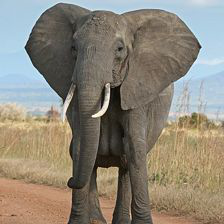

In [2]:
vgg = VGG19()
sample = load("Elephant.jpg")

In [3]:
classify(vgg, sample)

"African elephant, Loxodonta africana"

In [4]:
x = rand(Float32, 224, 224, 3, 1)
vgg(x)

1000×1 Array{Float32,2}:
 0.000187773  
 0.0013457881 
 0.00065416825
 0.001516063  
 0.002159681  
 0.0019295159 
 0.0075571863 
 0.00018473195
 0.00027696704
 0.00024519698
 0.0007056092 
 0.00031168468
 0.0004319956 
 ⋮            
 0.00045793416
 0.00017459881
 4.0051324e-5 
 6.417853e-5  
 0.00015019011
 2.528941e-5  
 0.0001304593 
 0.00019681951
 0.0001480493 
 0.00012605563
 0.00017881978
 0.020072509  

In [5]:
vgg.layers

Chain(Conv((3, 3), 3=>64, NNlib.relu), Conv((3, 3), 64=>64, NNlib.relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), Conv((3, 3), 64=>128, NNlib.relu), Conv((3, 3), 128=>128, NNlib.relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), Conv((3, 3), 128=>256, NNlib.relu), Conv((3, 3), 256=>256, NNlib.relu), Conv((3, 3), 256=>256, NNlib.relu), Conv((3, 3), 256=>256, NNlib.relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), Conv((3, 3), 256=>512, NNlib.relu), Conv((3, 3), 512=>512, NNlib.relu), Conv((3, 3), 512=>512, NNlib.relu), Conv((3, 3), 512=>512, NNlib.relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), Conv((3, 3), 512=>512, NNlib.relu), Conv((3, 3), 512=>512, NNlib.relu), Conv((3, 3), 512=>512, NNlib.relu), Conv((3, 3), 512=>512, NNlib.relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), getfield(Metalhead, Symbol("##44#45"))(), Dense(25088, 4096, NNlib.relu), Flux.Dropout{Float32}(0.5f0, false), Dense(4096, 4096, NNlib.relu), Flux.Dropout

### Models available:

* GoogLeNet
* ResNet
* VGG
* SqueezeNet
* DenseNet